# Laboratorio 2: Exploración y Visualización de Datos
Fecha: Marzo 2024

Integrantes: Nicolas Eduardo Bertran Ponce de Leon (Sección 2) - Juan Ignacio Molina Larraín (Sección 1)


## Declaración de compromiso ético

Nosotros/as Nicolas Eduardo Bertran Ponce de Leon y Juan Ignacio Molina Larraín, declaramos que realizamos de manera grupal los pasos de la presente actividad. También declaramos no incurrir en copia, ni compartir nuestras respuestas con otras personas ni con otros grupos. Por lo que, ratificamos que las respuestas son de nuestra propia confección y reflejan nuestro propio conocimiento.

## Instrucciones

1.  Trabajen en equipos de dos personas. Salvo excepciones, no se corregirá entregas con menos de dos integrantes.

2.  Modifique este archivo `.ipynb` agregando sus respuestas donde corresponda. Puede ocupar Jupyter notebook en su computador o usar Google Colab como alternativa online.

3.  Para cada pregunta **incluya el código fuente que utilizó para llegar a su respuesta. Respuestas sin código no recibirán puntaje.**.

4.  El formato de entrega para esta actividad es un archivo **html**. **Genere un archivo HTML usando Jupyter** y súbalo a U-Cursos. Basta con que un/a integrante haga la entrega. Si ambos/as hacen una entrega en U-Cursos, se revisará cualquiera de éstas.

# Práctica

## Accidentes de tránsito

Para esta sección utilizaremos un dataset real de número de accidentes de tránsito por localidad, el cual puede ser encontrado en el siguiente link: http://datos.gob.cl/dataset/9348. Para cargar el dataset ejecute el siguiente código:

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
tipos = pd.read_csv("https://users.dcc.uchile.cl/~hsarmien/mineria/datasets/accidentes_2010_2011.txt", sep=" ")
tipos.head()

,Muestra,Descripcion,Anio,TipoAccidente,Cantidad
1,Nacional,Nacional,2010,Atropello,8247
2,Nacional,Nacional,2011,Atropello,8339
3,Regional,XV Región Arica y Parinacota,2010,Atropello,115
4,Regional,XV Región Arica y Parinacota,2011,Atropello,159
5,Comunal,ARICA,2010,Atropello,115


Explore el set de datos para responder las siguientes preguntas:

1. ¿Cuáles son las dimensiones del dataset (filas, columnas)? (Recuerde adjuntar código).

In [ ]:
#Utilizamos .shape() para obtener las dimensiones del data set
tipos.shape

(4296, 5)

2. ¿Qué describe cada línea del dataset? (ejemplifique tomando el dato de la fila 235, extienda la descripción)

La columna muestra indica la dimension regional en que se tomo la muestra. Descripcion corresponde a una descripcion . Año nos indica el año en que ocurrieron los accidentes. TipoAccidente nos indica el tipo de accidente. Cantidad nos indica la cantidad de accidentes ocurridos.

In [ ]:
#Utilizamos .iloc para rescatar los datos correspondientes a la fila 235
tipos.iloc[234]

Muestra            Comunal
Descripcion       PALMILLA
Anio                  2010
TipoAccidente    Atropello
Cantidad                 4
Name: 235, dtype: object

Esto nos indica una muestra de cuatro atropellos registrados durante el año 2010 en la comuna de Palmilla.

3. ¿Cuántos años diferentes abarca la información del dataset? Entregue un array con los años.


El dataset abarca los años 2010 y 2011

In [ ]:
#Obtenemos los anios unicos que contempla el dataset usando .drop_duplicates y .values
years_array = tipos['Anio'].drop_duplicates().values
years_array

array([2010, 2011])

4. Filtre los datos para incluir sólo los accidentes ocurridos el año 2011 a nivel Regional. Luego, genere un gráfico de barras que muestre la cantidad de accidentes en cada Región. Comente sus principales observaciones y si considera que es razonable usar el conteo de frecuencias para determinar las regiones que tuvieron más accidentes.

R: Notamos que con diferencia la región con mayor accidentes es la Metropolitana, lo cual es lógico al considerar la cantidad de habitantes en cada región. El gráfico es lo suficientemente explícito en la cantidad de accidentes por región como para hacer innecesario un conteo de frecuencias para lograr un entendimiento correcto de este aspecto del dataset

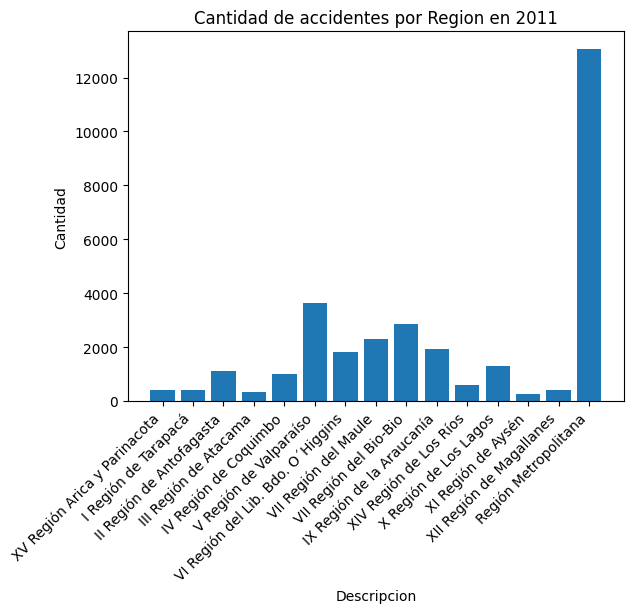

In [ ]:
#Obtenemos los datos que corresponden al 2011 a nivel Regional y luego graficamos
accidentes2011 = tipos[(tipos['Anio'] == 2011 ) & (tipos['Muestra'] == 'Regional')]

plt.bar(accidentes2011['Descripcion'], accidentes2011['Cantidad'])
plt.xlabel('Descripcion')
plt.ylabel('Cantidad')
plt.title('Cantidad de accidentes por Region en 2011')
plt.xticks(rotation=45, ha='right')
plt.show()

5. Filtre los datos para incluir sólo los accidentes ocurridos el año 2010 a nivel regional. Genere un boxplot donde se indique la cantidad de accidentes categorizado por tipo de accidente. ¿Cuáles son sus principales observaciones?

Lo principal que se puede observar en este gráfico es la presencia de outliers que se desvían en gran magnitud del resto de datos, lo cual puede resultar en alteraciones a la hora de observar la media de estos datos


In [ ]:
# Importamos el modúlo express de plotly para crear boxplots
import plotly.express as px

accidentes2010 = tipos[(tipos['Anio'] == 2010) & (tipos['Muestra'] == 'Regional')]
boxplot = px.box(accidentes2010, x='Cantidad', y='TipoAccidente')
boxplot.show()

6. ¿Qué otra forma de explorar los datos podría agregar para el dataset de Accidentes de tránsito y qué información adicional aporta? Adjunte el código necesario.

Otra forma de explorar los datos puede hacer un análisis comparativo entre los tipos de accidentes. Podemos crear un gráfico de barras con el tipo de accidente vs la cantidad, para estimar que accidentes son más o menos comunes.


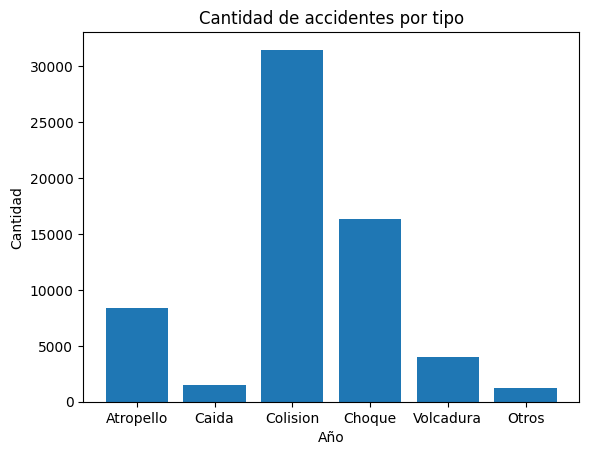

In [ ]:
plt.bar(tipos['TipoAccidente'], tipos['Cantidad'])
plt.xlabel('Año')
plt.ylabel('Cantidad')
plt.title('Cantidad de accidentes por tipo')
plt.show()

## Diabetes
Considere el set de datos de pacientes para la predicción de diabetes con las siguientes columnas:

- gender: género del paciente
- age: edad del paciente
- hypertension: indica si el paciente tiene o no hipertensión
- heart_disease: indica si el paciente tiene o no enfermedad cardiaca
- smoking_history: indica si el paciente es o fue fumador
- bmi: indice de masa corporal del paciente
- HbA1c_level: Hemoglobina HbA1c del paciente
- blood_glucose_level: Nivel de glucosa en sangre del paciente
- diabetes: si el paciente tiene o no diabetes

In [ ]:
diabetes = pd.read_csv("https://raw.githubusercontent.com/mzambrano1/Datasets-CC5205-otono-2023/master/lab1.2%202023-2/diabetes_prediction_dataset.csv")
diabetes.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


7. Para explorar el dataset, realice un análisis de frecuencias de los atributos categóricos (categorías binarias y multiclase).



In [ ]:
#Obtenemos las cantidades de diabeticos basadas en sus condiciones previas

#Cantidad de personas que son o han sido fumadoras
frec_smoker = len(diabetes[((diabetes['smoking_history']== 'current') | (diabetes['smoking_history']=='former')) & (diabetes['diabetes']==1)])

#Cantidad de personas que presentan hipertension
frec_hypertension = len(diabetes[(diabetes['hypertension']== 1)  & (diabetes['diabetes']==1)])

#Cantidad de personas con problemas
frec_heart = len(diabetes[(diabetes['heart_disease']== 1)  & (diabetes['diabetes']==1)])

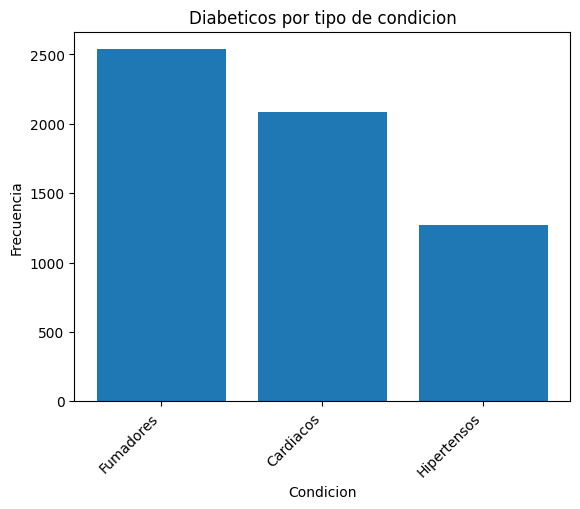

In [ ]:
#Generamos un grafico de barras a partir de los datos anteriores

#Asignamos los valores del eje x e y a un arreglo correspondiente
labels =['Fumadores', 'Cardiacos', 'Hipertensos']
frecs = [frec_smoker, frec_hypertension,frec_heart]

plt.bar(labels, frecs)
plt.xlabel('Condicion')
plt.ylabel('Frecuencia')
plt.title('Diabeticos por tipo de condicion')
plt.xticks(rotation=45, ha='right')
plt.show()

8. Muestre estadísticas de resumen para las variables numéricas y comenten sus observaciones.

Comparando el promedio y la mediana de la edad y el bmi, podemos concluir que en general, las personas diabeticas tienden a tener aproximadamente 60 años y a tener un BMI cercano a 30. Esto lo podemos ver en el siguiente código, viendo estos valores para las columnas age y bmi usando las funciones mean y median para el dataframe que filtra por pacientes diabéticos.

In [ ]:
#Obtenemos los promedios para las personas que presentan diabetes
diabetes[(diabetes['diabetes'] == 1)].mean()

<ipython-input-32-a468d5c637bf>:2: FutureWarning:

The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.



age                     60.946588
hypertension             0.245647
heart_disease            0.149059
bmi                     31.988382
HbA1c_level              6.934953
blood_glucose_level    194.094706
diabetes                 1.000000
dtype: float64

In [ ]:
#Obtenemos las medianas para las personas que presentan diabetes
diabetes[(diabetes['diabetes'] == 1)].median()

<ipython-input-33-90bdece28495>:2: FutureWarning:

The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.



age                     62.00
hypertension             0.00
heart_disease            0.00
bmi                     29.97
HbA1c_level              6.60
blood_glucose_level    160.00
diabetes                 1.00
dtype: float64

Y eso es todo por hoy :)
